## Infinite

In [89]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

infinite_q_table = np.load('infinite_q_table.npy')
infinite_q_table_no_ace = np.zeros([19,2])
infinite_q_table_ace = np.zeros([19,2])


for index_s, state in enumerate(infinite_q_table): 
    for index_a, ace in enumerate(state): 
        if index_a == 1: 
            infinite_q_table_ace[index_s][0] = ace[0]
            infinite_q_table_ace[index_s][1] = ace[1]
            
        else: 
            infinite_q_table_no_ace[index_s][0] = ace[0]
            infinite_q_table_no_ace[index_s][1] = ace[1]


q_table_no_ace_df = pd.DataFrame(infinite_q_table_no_ace, columns=['stick NA', 'hit NA'], index=np.arange(2,21))
q_table_ace_df = pd.DataFrame(infinite_q_table_ace, columns=['stick A', 'hit A'], index=np.arange(2,21))

q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)
q_table

,stick NA,hit NA,stick A,hit A
2,4.0,485.746684,0.0,0.000000
3,9.0,477.857252,0.0,0.000000
4,16.0,457.537907,0.0,0.000000
5,25.0,469.190264,0.0,0.000000
6,36.0,457.756820,0.0,0.000000
7,49.0,444.813507,0.0,0.000000
8,64.0,440.723587,0.0,0.000000
9,81.0,435.726445,0.0,0.000000
10,100.0,428.692635,0.0,0.000000
11,121.0,432.613141,121.0,536.216649


In [90]:
track = np.load('trackerson_the_2nd.npy')
print(track.shape)

tracker_infinite = np.zeros([19,2])

for index_s, state in enumerate(track): 
    for index_p, ace in enumerate(state): 
            tracker_infinite[index_s][index_p] = ace
               
tracker_infinite_df = pd.DataFrame(tracker_infinite, columns=['no ace', 'ace'], index=np.arange(2,21))
tracker_infinite_df

(19, 2)


,no ace,ace
2,1964.0,0.0
3,1902.0,0.0
4,2010.0,0.0
5,2116.0,0.0
6,2321.0,0.0
7,2347.0,0.0
8,2614.0,0.0
9,2665.0,0.0
10,8472.0,0.0
11,1030.0,1960.0


(19, 2)


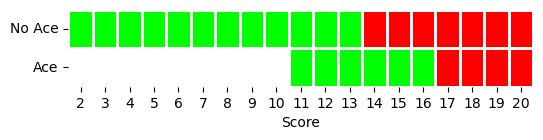

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

infinite_q_policy = np.load('infinite_policy.npy')
print(infinite_q_policy.shape)
policy_df = pd.DataFrame(infinite_q_policy, columns=['No Ace', 'Ace'], index=np.arange(2,21))


fig, ax = plt.subplots(1, 1, figsize=(6, 1))  
cmap = ListedColormap(['#FF0000', '#00FF00'])

mask1 = np.full_like(infinite_q_policy.T, False, dtype=bool)
mask1[1,0:9] = True

sns.heatmap(infinite_q_policy.T, cmap=cmap, 
            cbar_kws={'shrink': 0.8},
            linecolor='white', linewidths=1,
            ax=ax, cbar=False,
            mask=mask1)

ax.set_xlabel('Score')
ax.set_yticklabels(('No Ace', 'Ace'))
ax.set_xticklabels(('2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'))
ax.tick_params('y', rotation=0)

plt.show()

## Finite

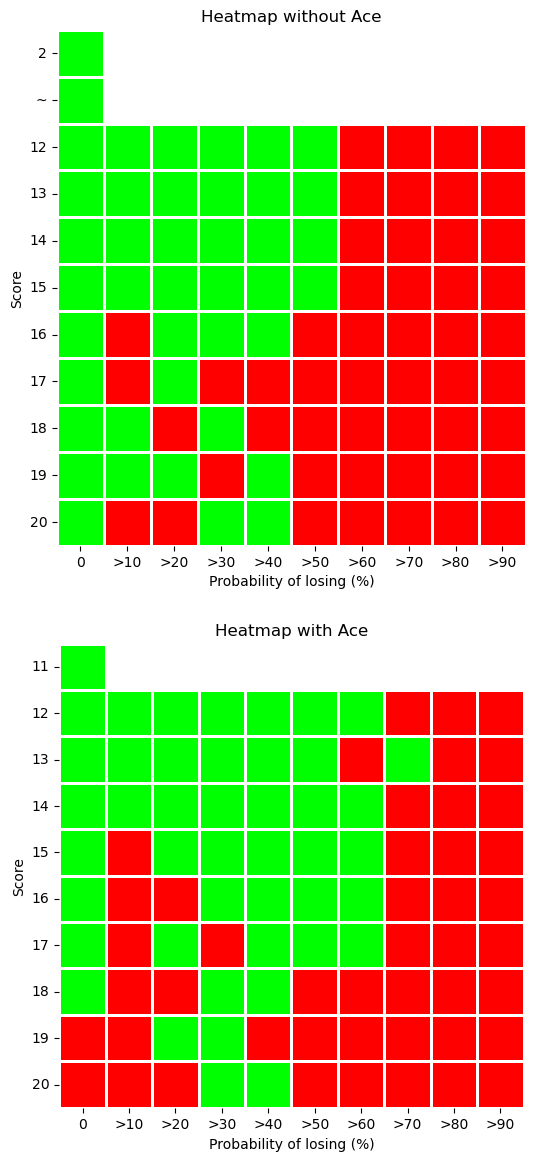

In [92]:
finite_q_policy = np.load('finite_policy.npy')
finite_q_policy_noace = np.zeros([19,10])
finite_q_policy_ace = np.zeros([19,10])
for index_s, state in enumerate(finite_q_policy): 
    for index_p, percentage in enumerate(state): 
        finite_q_policy_noace[index_s][index_p] = percentage[0]
        finite_q_policy_ace[index_s][index_p] = percentage[1]

finite_q_policy_noace = np.delete(finite_q_policy_noace,(0,1,2,3,4,5,6,7) ,axis=0)
finite_q_policy_ace = np.delete(finite_q_policy_ace,(0,1,2,3,4,5,6,7,8) ,axis=0)

q_policy_noace_df = pd.DataFrame(finite_q_policy_noace, columns=np.arange(0,10), index=np.arange(10,21))
#q_policy_noace_df.iloc[0:10,1:10]= 3
q_policy_ace_df = pd.DataFrame(finite_q_policy_ace, columns=np.arange(0,10), index=np.arange(11,21))


fig, ax = plt.subplots(2, 1, figsize=(8, 14), gridspec_kw={'height_ratios': [30, 27]})  
cmap = ListedColormap(['#FF0000', '#00FF00'])

mask2 = np.full_like(q_policy_noace_df, False, dtype=bool)
mask2[0:2,1:10] = True

sns.heatmap(q_policy_noace_df, cmap=cmap, 
            cbar_kws={'shrink': 0.8},
            square=True,
            linecolor='white', linewidths=1,
            ax=ax[0], cbar=False,
            mask=mask2)

ax[0].set_xlabel('Probability of losing (%)')
ax[0].set_ylabel('Score')
ax[0].tick_params('y', rotation=0)
ax[0].set_title('Heatmap without Ace')
ax[0].set_yticklabels(('2','~','12','13','14','15','16','17','18','19','20'))
ax[0].set_xticklabels(('0','>10','>20','>30','>40','>50','>60','>70','>80','>90'))

mask3 = np.full_like(q_policy_ace_df, False, dtype=bool)
mask3[0,1:] = True

sns.heatmap(q_policy_ace_df, cmap=cmap,
            cbar_kws={'shrink': 0.8},
            square=True,
            linecolor='white', linewidths=1,
            ax=ax[1], cbar=False,
            mask=mask3)

ax[1].set_xlabel('Probability of losing (%)')
ax[1].set_ylabel('Score')
ax[1].tick_params('y', rotation=0)
ax[1].set_title('Heatmap with Ace')
ax[1].set_xticklabels(('0','>10','>20','>30','>40','>50','>60','>70','>80','>90'))

plt.show()

In [93]:
mux = pd.MultiIndex.from_product([[0,1,2,3,4,5,6,7,8,9], ['Hit', 'Stick']])

q_finite_values = np.load('finite_q_table.npy')


q_finite_no_ace = np.zeros([19,20])
q_finite_ace = np.zeros([19,20])


for index_s, state in enumerate(q_finite_values): #19
    
    for index_p, percentage in enumerate(state): #10

        i_1 = 0
        i_2 = 0 
        for index_a, ace in enumerate(state): # 2

            if index_a == 1: 
                
                q_finite_ace[index_s][i_1] = ace[1][0]
                i_1 += 1
                q_finite_ace[index_s][i_1] = ace[1][1]
                i_1 += 1
            else: 
                q_finite_no_ace[index_s][i_2] = ace[0][0]
                i_2 += 1 
                q_finite_no_ace[index_s][i_2] = ace[0][1]
                i_2 += 1
          
print(q_finite_no_ace.shape)


# q_table_no_ace_df = pd.DataFrame(q_table_no_ace, columns=mux, index=np.arange(2,21))
# q_table_ace_df = pd.DataFrame(q_table_ace, columns=mux, index=np.arange(2,21))

# q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)

# Create a MultiIndex for the columns
columns = pd.MultiIndex.from_product([range(10), ['stick', 'hit']],
                                     names=['%', 'action'])

# Reshape the numpy array into 19 rows and 20 columns (10 columns * 2 subcolumns)
#reshaped_data = q_finite_no_ace.reshape((19,20))


# Create the DataFrame
df = pd.DataFrame(q_finite_no_ace, columns=columns, index=np.arange(2,21))
df

(19, 20)


%                0                        1                       2  \
action       stick          hit       stick         hit       stick   
2         4.000000  1145.586265    0.000000    0.000000    0.000000   
3         9.000000  1149.975286    0.000000    0.000000    0.000000   
4        16.000000  1150.553699    0.000000    0.000000    0.000000   
5        25.000000  1151.597558    0.000000    0.000000    0.000000   
6        36.000000  1146.288595    0.000000    0.000000    0.000000   
7        49.000000  1133.065168    0.000000    0.000000    0.000000   
8        64.000000  1113.782685    0.000000    0.000000    0.000000   
9        81.000000  1070.170075    0.000000    0.000000    0.000000   
10      100.000000   994.294500    0.000000    0.000000    0.000000   
11      121.000000   893.704022    0.000000    0.000000    0.000000   
12      144.000000  1005.642734  144.000000  430.746833  144.000000   
13      169.000000   996.347019  169.000000  432.791232  169.000000   
14      196.000000   970.663020  196.000000  432.833152  196.000000   
15      225.000000   950.437735  225.000000  417.364829  225.000000   
16      256.000000   907.270517  256.000000  387.813126  256.000000   
17      289.000000   852.587570  220.556037  418.559847  289.000000   
18      323.996550   775.264838  313.758730  175.845993  324.000000   
19      357.176270   641.162164    4.330222  295.402046  358.618096   
20      394.265398   441.000000  318.036381   31.208725   13.838591   

%                            3                  4                  5  \
action         hit       stick         hit  stick         hit  stick   
2         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
3         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
4         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
5         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
6         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
7         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
8         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
9         0.000000    0.000000    0.000000    0.0    0.000000    0.0   
10        0.000000    0.000000    0.000000    0.0    0.000000    0.0   
11        0.000000    0.000000    0.000000    0.0    0.000000    0.0   
12      423.385916  144.000000  297.627105  144.0  231.217195  144.0   
13      401.719230  169.000000  311.271416  169.0  233.434146  169.0   
14      414.643335  196.000000  293.855236  196.0  238.920335  196.0   
15      422.578346  225.000000  292.179802  225.0  232.131346  225.0   
16      408.418093  256.000000  288.175587  256.0  217.301208  256.0   
17      265.881132  289.000000  283.053490  289.0  229.833000  289.0   
18      431.972784  324.000000  180.069990  324.0  201.298642  324.0   
19      333.364292  142.398022  349.918179  361.0  252.721263  361.0   
20      389.488072    1.597637   62.751490  400.0   70.000274  400.0   

%                            6                       7                  8  \
action         hit       stick         hit       stick         hit  stick   
2         0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
3         0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
4         0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
5         0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
6         0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
7         0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
8         0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
9         0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
10        0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
11        0.000000    0.000000    0.000000    0.000000    0.000000    0.0   
12       92.734592  143.999999   65.796889  143.042417    5.808710  144

In [94]:
print(q_finite_values[10][1][0][1])


404.6692324966296


In [95]:
trackerr = np.load('trackery_mcTrackerson.npy')
print(trackerr.shape)

tracker_noace = np.zeros([19,10])
tracker_ace = np.zeros([19,10])

for index_s, state in enumerate(trackerr): 
    for index_p, percentage in enumerate(state): 
            tracker_noace[index_s][index_p] = percentage[0]
            tracker_ace[index_s][index_p] = percentage[1]

            
        
tracker_noace_df = pd.DataFrame(tracker_noace, columns=np.arange(0,10), index=np.arange(2,21))
tracker_noace_df

(19, 10, 2)


,0,1,2,3,4,5,6,7,8,9
2,83370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,83520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88363.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,94946.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,99560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,107296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,113578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,121912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,379642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,54502.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Graphing average values of hands

In [85]:
import numpy as np 
import matplotlib.pyplot as plt
sumOfHand = np.load("../tracking/hand_sum_tracking_data.npy")
alpha_tracking = np.load("../tracking/alpha_tracking_data.npy")

In [86]:
def cumulative_sum_array(input_array):
    return np.cumsum(input_array)

sumOfPrevious = cumulative_sum_array(sumOfHand)

cumulativeSum = cumulative_sum_array(sumOfHand)



def create_index_plus_one_array(length):
    return np.arange(length) + 1


alpha_6 = alpha_tracking

numberOfHands = create_index_plus_one_array(len(sumOfHand))

averageValueOfHands_19 = np.divide(cumulativeSum, numberOfHands)
Value_of_hands_19 = sumOfHand

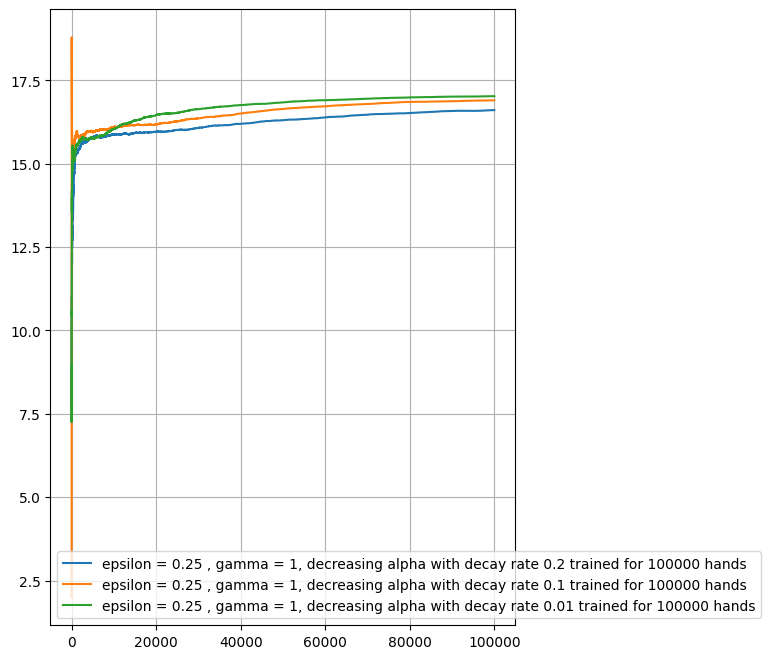

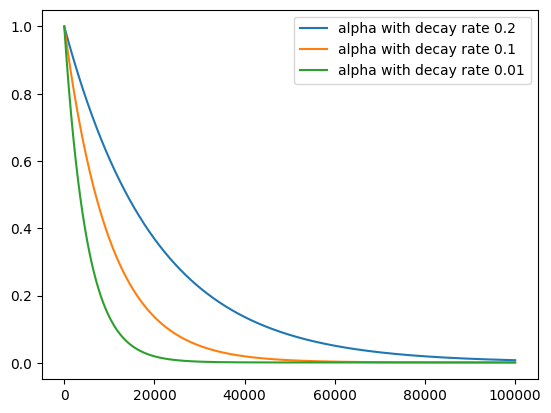

In [27]:
#plt.plot(averageValueOfHands_1, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
# 

plt.figure(figsize=(6, 8))


#plt.plot(averageValueOfHands_3, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.8 trained for 100000 hands')
plt.plot(averageValueOfHands_2, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
plt.plot(averageValueOfHands_5, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.1 trained for 100000 hands')
plt.plot(averageValueOfHands_4, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')

plt.legend()
plt.grid(True)
plt.show()



# plt.plot(averageValueOfHands_2, label='decreasing alpha 10000 with decay rate 5')
# plt.legend()

# plt.show()

# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()


# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()


plt.plot(alpha_2, label = 'alpha with decay rate 0.2')
plt.plot(alpha_5, label = 'alpha with decay rate 0.1')
plt.plot(alpha_4 ,label = 'alpha with decay rate 0.01')
# plt.plot(alpha_3)
# plt.plot(alpha_2)
#plt.plot(alpha_3, label = 'alpha with decay rate 0.8')

plt.legend()
plt.show()

plotting various values of gamma

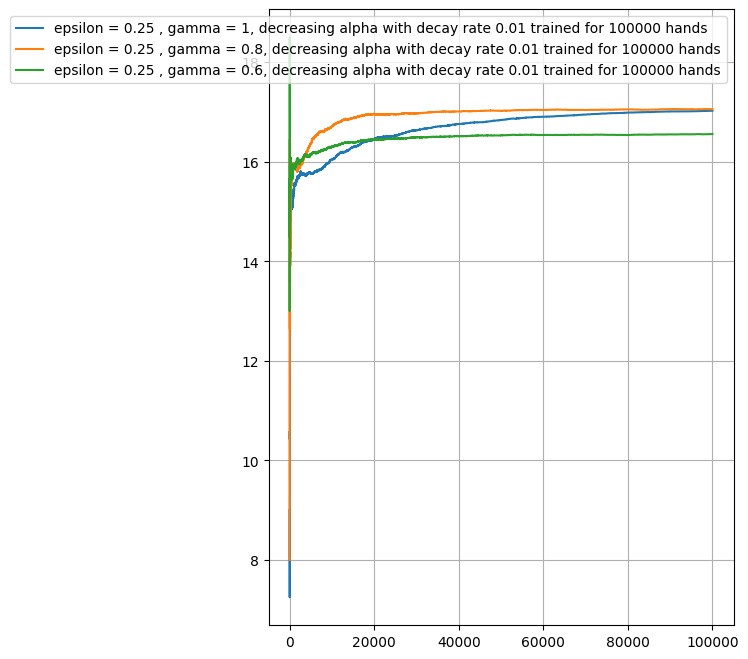

In [50]:
plt.figure(figsize=(6, 8))
plt.plot(averageValueOfHands_4, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
#plt.plot(averageValueOfHands_8, label='epsilon = 0.25 , gamma = 0.9, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_6, label='epsilon = 0.25 , gamma = 0.8, decreasing alpha with decay rate 0.01 trained for 100000 hands')
#plt.plot(averageValueOfHands_9, label='epsilon = 0.25 , gamma = 0.7, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_7, label='epsilon = 0.25 , gamma = 0.6, decreasing alpha with decay rate 0.01 trained for 100000 hands')


plt.legend()
plt.grid(True)
plt.show()

plotting various values of epsilon

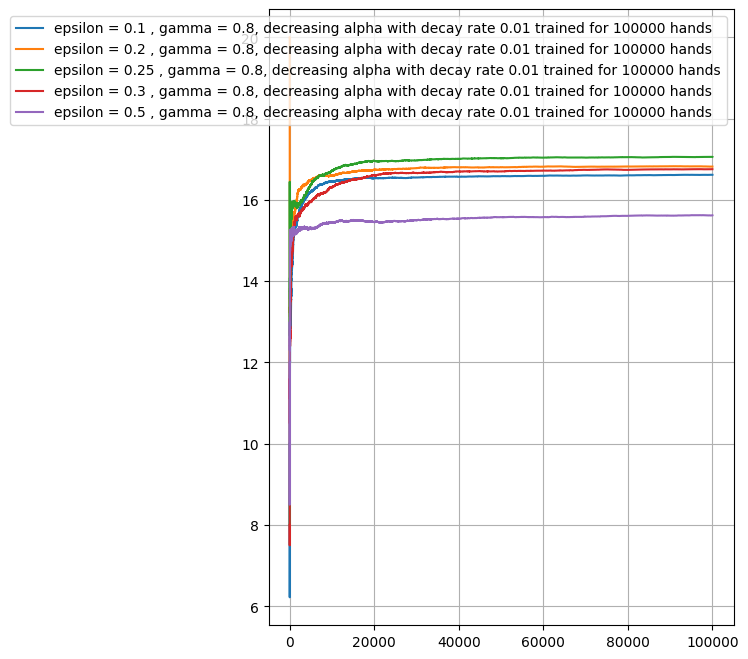

In [63]:
plt.figure(figsize=(6, 8))
plt.plot(averageValueOfHands_11, label='epsilon = 0.1 , gamma = 0.8, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_12, label='epsilon = 0.2 , gamma = 0.8, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_6, label='epsilon = 0.25 , gamma = 0.8, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_13, label='epsilon = 0.3 , gamma = 0.8, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_10, label='epsilon = 0.5 , gamma = 0.8, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.legend()
plt.grid(True)
plt.show()

/Users/scottunderdown/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


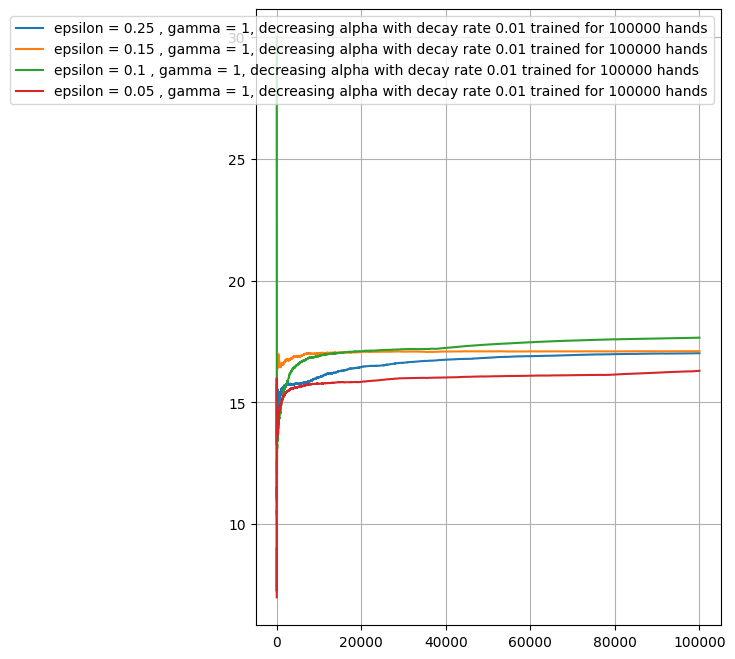

In [90]:

plt.figure(figsize=(6, 8))
#plt.plot(averageValueOfHands_15, label='epsilon = 0.3 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_4, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
#plt.plot(averageValueOfHands_14, label='epsilon = 0.2 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_19, label='epsilon = 0.15 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_16, label='epsilon = 0.1 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
#plt.plot(averageValueOfHands_17, label='epsilon = 0 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_18, label='epsilon = 0.05 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')

plt.legend()
plt.grid(True)
plt.show()

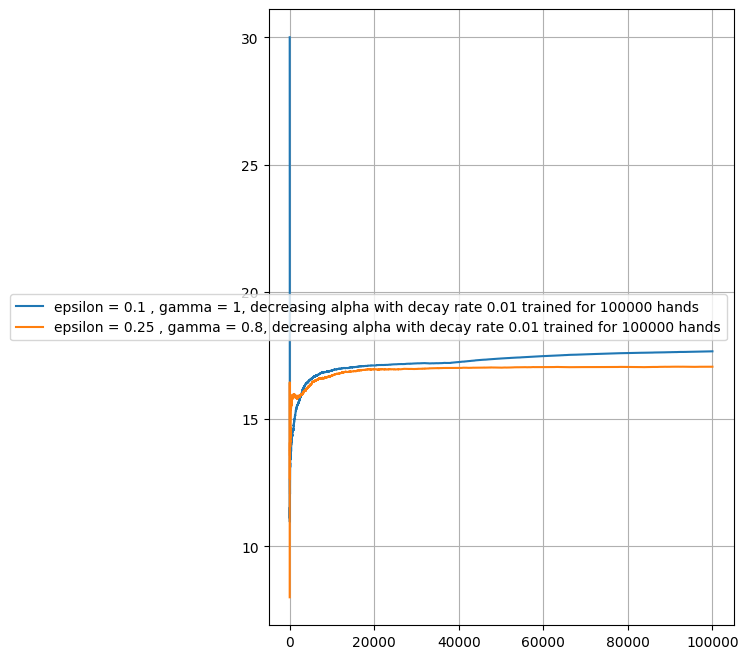

In [91]:

plt.figure(figsize=(6, 8))

plt.plot(averageValueOfHands_16, label='epsilon = 0.1 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.plot(averageValueOfHands_6, label='epsilon = 0.25 , gamma = 0.8, decreasing alpha with decay rate 0.01 trained for 100000 hands')
plt.legend()
plt.grid(True)
plt.show()